In [24]:
# Basic data handling & visuals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modelling
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    StratifiedKFold
)

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    OneHotEncoder,
    LabelEncoder
)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models & metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    log_loss
)

# Optional regression metrics
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error
)

In [25]:
df=pd.read_csv("ML-LogisticRegression.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [26]:
df.shape

(1470, 35)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [28]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [29]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [30]:
df.duplicated().any()

np.False_

In [31]:
df=df.drop(columns=['EmployeeNumber','Over18','EmployeeCount','StandardHours'])


In [32]:
df.duplicated().sum()

np.int64(0)

In [33]:
df.shape

(1470, 31)

In [34]:
df_categorical=df.select_dtypes(exclude='number').columns.to_list()
df_categorical

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [35]:
df_numeric=df.select_dtypes(include='number').columns.to_list()
df_numeric


['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

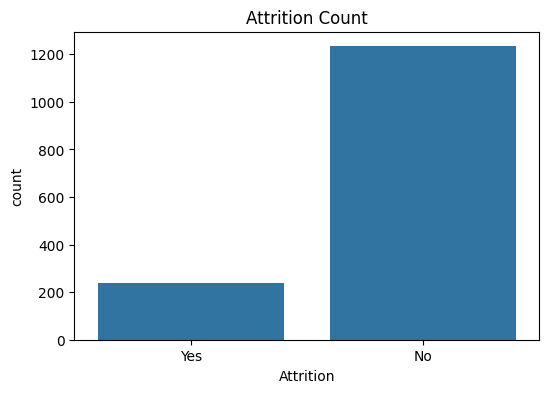

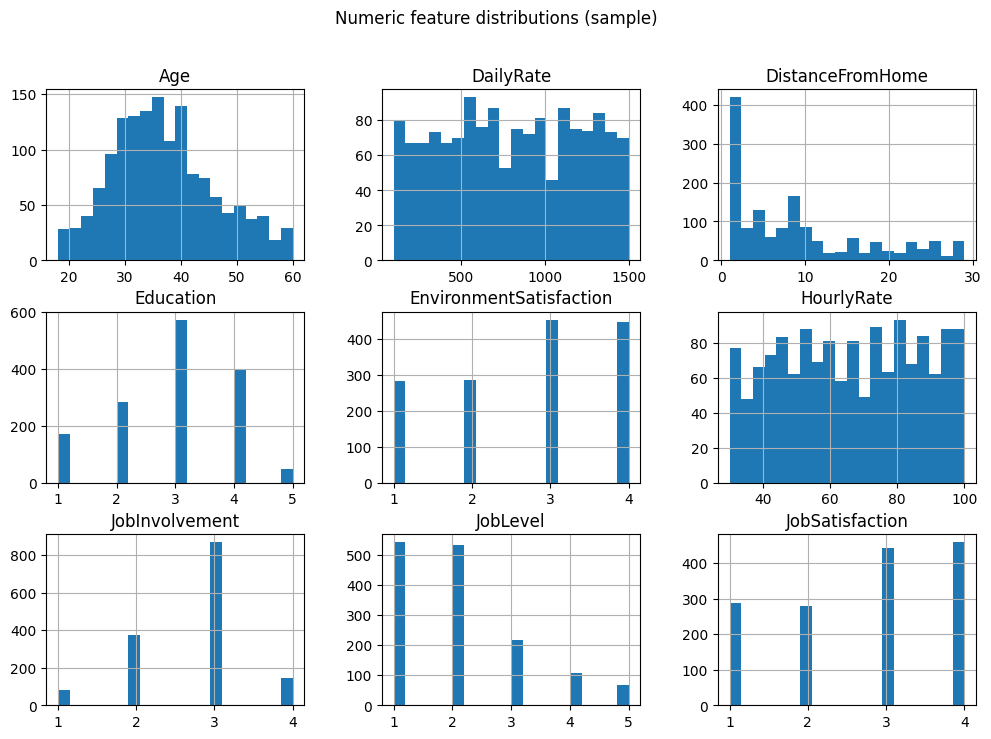

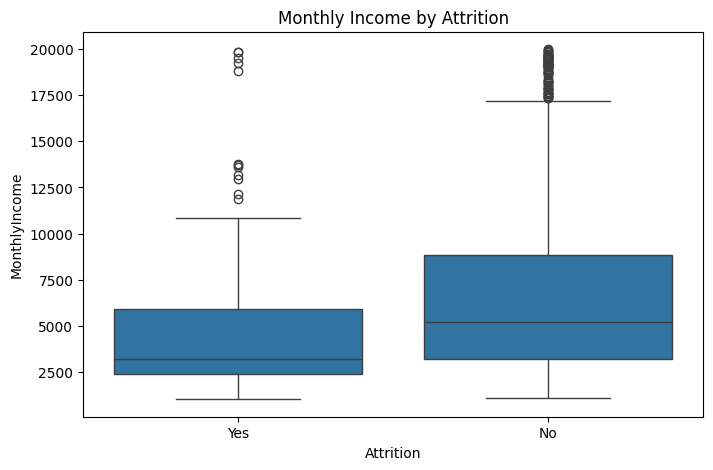

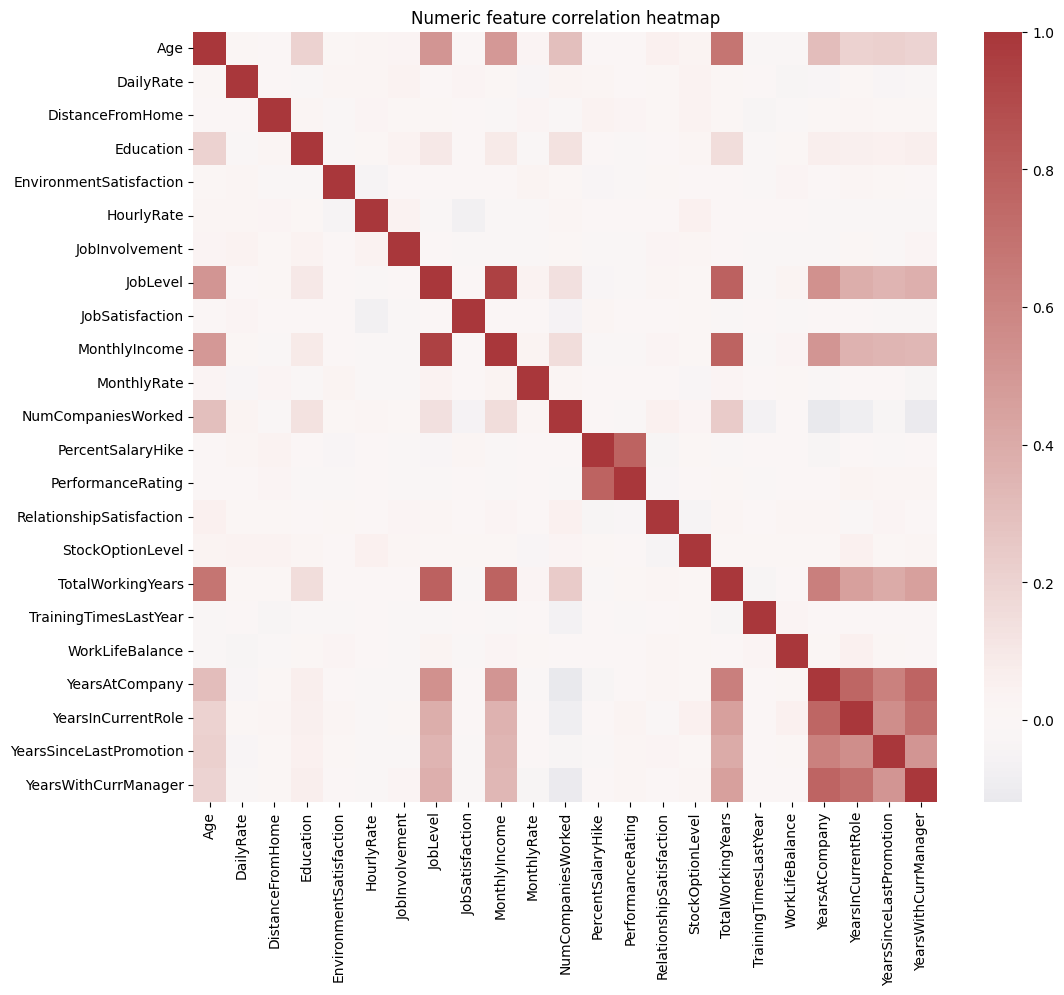

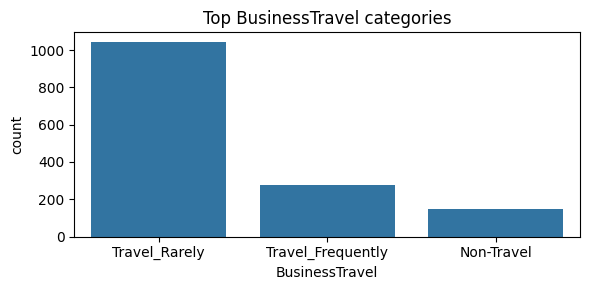

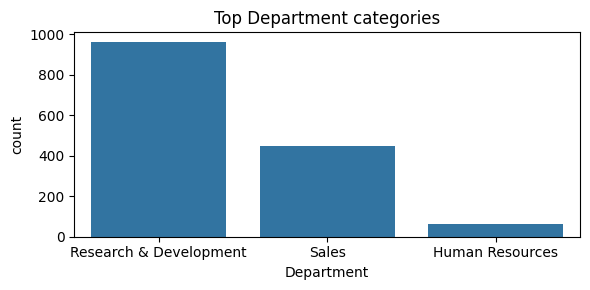

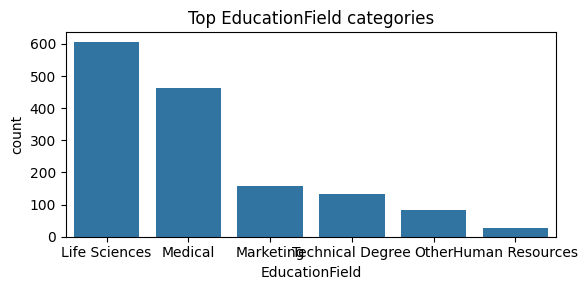

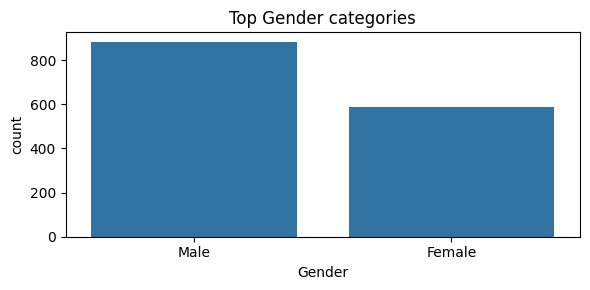

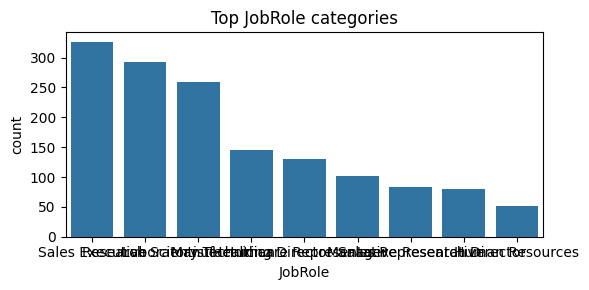

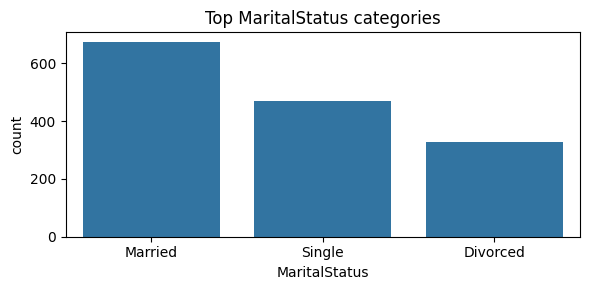

In [ ]:
# 1) Target distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')
plt.show()

# 2) Numerical distributions (histograms) for selected numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
sample_num = num_cols[:9]  # show first 9 numeric columns
df[sample_num].hist(bins=20, figsize=(12,8))
plt.suptitle('Numeric feature distributions (sample)')
plt.show()

# 3) Boxplot for MonthlyIncome vs Attrition
if 'MonthlyIncome' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
    plt.title('Monthly Income by Attrition')
    plt.show()

# 4) Correlation heatmap for numeric features
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=False, cmap='vlag', center=0)
plt.title('Numeric feature correlation heatmap')
plt.show()

# 5) Categorical features: top categories for a few columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [c for c in cat_cols if c != 'Attrition'][:6]

for c in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=c, data=df, order=df[c].value_counts().index[:10])
    plt.title(f"Top {c} categories")
    plt.tight_layout()
    plt.show()

Columns available:
 ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_flag']

Target variable created successfully!
Numeric features: 23
Categorical features: 7
Train shape: (1176, 30) Test shape: (294, 30)
Final feature count: 51

Model Evaluation:
Accuracy  : 0.7517
Precision : 0.3488
Recall    : 0.6383
F1-score  : 0.4511
ROC-AUC   : 0.8032

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84       247
           1    

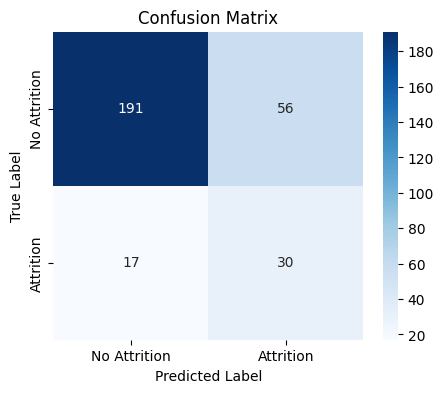

In [45]:
# 1 CLEAN COLUMN NAMES AND CHECK TARGET
# -------------------------------------
df.columns = df.columns.str.strip()   # remove any accidental spaces
print("Columns available:\n", df.columns.tolist())

# Create the binary target safely
if 'Attrition' in df.columns:
    df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
    df.drop(columns=['Attrition'], inplace=True)
elif 'Attrition_flag' not in df.columns:
    raise KeyError("Neither 'Attrition' nor 'Attrition_flag' found. Please check column names!")

print("\nTarget variable created successfully!")

# -------------------------------------
# 2 DEFINE FEATURES AND TARGET
# -------------------------------------
X = df.drop(columns=['Attrition_flag'])
y = df['Attrition_flag']

# Separate numeric and categorical features
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numeric features: {len(num_features)}")
print(f"Categorical features: {len(cat_features)}")

# 3 PREPROCESSING PIPELINE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Numerical features pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical features pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

# 4️⃣ TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train_raw.shape, "Test shape:", X_test_raw.shape)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

feature_names = []

# Add numerical feature names
feature_names.extend(num_features)

# Add categorical feature names after one‑hot encoding
if cat_features:
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    ohe_cols = list(ohe.get_feature_names_out(cat_features))
    feature_names.extend(ohe_cols)

print("Final feature count:", len(feature_names))


# 5️⃣ LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

# Class predictions
y_pred = model.predict(X_test)

# Probability predictions (for ROC-AUC)
y_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

print("\nModel Evaluation:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test, y_proba):.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['No Attrition','Attrition'],yticklabels=['No Attrition','Attrition'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [41]:
# 7 K-FOLD CROSS-VALIDATION
# -------------------------------------------------------------
from sklearn.model_selection import StratifiedKFold, cross_val_score

print("\nCross-Validation Mean Accuracies:")
for cv in [5, 10, 15]:
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, preprocessor.fit_transform(X), y, cv=skf, scoring='accuracy')
    print(f"CV={cv} -> Mean={scores.mean():.4f} ± {scores.std():.4f}")




Cross-Validation Mean Accuracies:
CV=5 -> Mean=0.7524 ± 0.0198
CV=10 -> Mean=0.7578 ± 0.0216
CV=15 -> Mean=0.7571 ± 0.0336



Top 10 most influential features:


,feature,coef,abs_coef
42,JobRole_Research Director,-1.465683,1.465683
39,JobRole_Laboratory Technician,1.194333,1.194333
45,JobRole_Sales Representative,1.120617,1.120617
23,BusinessTravel_Non-Travel,-0.993885,0.993885
49,OverTime_No,-0.892809,0.892809
33,EducationField_Other,-0.798108,0.798108
24,BusinessTravel_Travel_Frequently,0.787566,0.787566
50,OverTime_Yes,0.761522,0.761522
29,EducationField_Human Resources,0.721129,0.721129
37,JobRole_Healthcare Representative,-0.647202,0.647202


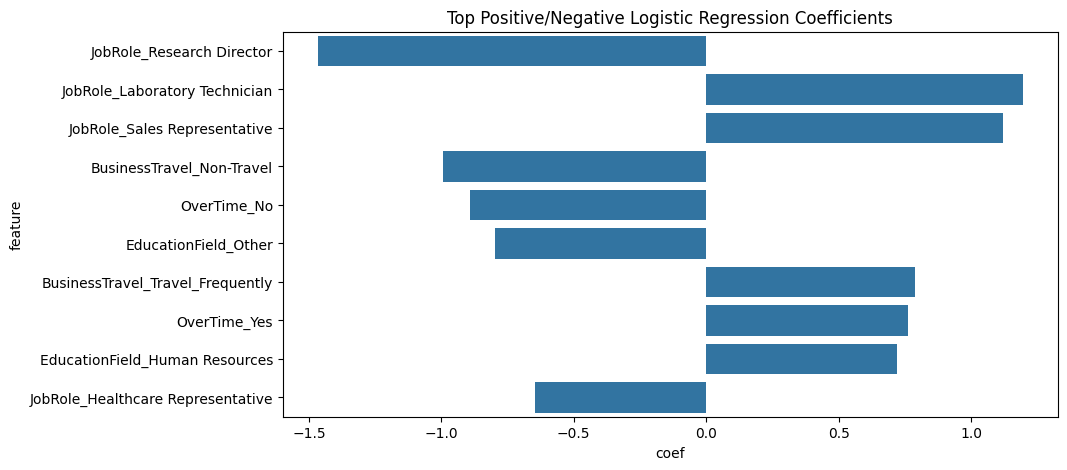

In [42]:
# -------------------------------------------------------------
# 8 FEATURE IMPORTANCE (COEFFICIENTS)
# -------------------------------------------------------------
coefs = model.coef_.ravel()
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
coef_df['abs_coef'] = coef_df['coef'].abs()
coef_df.sort_values('abs_coef', ascending=False, inplace=True)

print("\nTop 10 most influential features:")
display(coef_df.head(10))

plt.figure(figsize=(10, 5))
sns.barplot(x='coef', y='feature', data=coef_df.head(10))
plt.title('Top Positive/Negative Logistic Regression Coefficients')
plt.show()

In [43]:
# 9️⃣ PREDICT ON A SINGLE SAMPLE (EXAMPLE)

# Take one sample from test data (as a DataFrame, not Series)
sample = X_test_raw.iloc[[0]]

# Apply preprocessing
sample_transformed = preprocessor.transform(sample)

# Prediction (class)
sample_pred = model.predict(sample_transformed)[0]

# Prediction probability
sample_prob = model.predict_proba(sample_transformed)[0][1]

print("Single sample prediction:")
print("Predicted Attrition (1=Yes, 0=No):", sample_pred)
print("Predicted Probability of Attrition:", round(sample_prob, 3))


Single sample prediction:
Predicted Attrition (1=Yes, 0=No): 0
Predicted Probability of Attrition: 0.288


In [49]:
#SMOTE Analysis (Synthetic Minority Oversampling Techniques)

# -------------------------------------------------------------
# 1 HANDLE CLASS IMBALANCE USING SMOTE
# -------------------------------------------------------------
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Recreate preprocessing pipeline for clarity
X = df.drop(columns=['Attrition_flag'])
y = df['Attrition_flag']

# Split before applying SMOTE to prevent data leakage
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply preprocessing
X_train_pre = preprocessor.fit_transform(X_train_raw)
X_test_pre = preprocessor.transform(X_test_raw)

print("Before SMOTE class distribution:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_pre, y_train)

print("\nAfter SMOTE class distribution:")
print(pd.Series(y_train_sm).value_counts())

from sklearn.linear_model import LogisticRegression

model_sm = LogisticRegression(
    max_iter=1000,
    random_state=42
)

model_sm.fit(X_train_sm, y_train_sm)

# Class predictions
y_pred_sm = model_sm.predict(X_test_pre)

# Probability predictions
y_proba_sm = model_sm.predict_proba(X_test_pre)[:, 1]

print("\nModel Evaluation After SMOTE:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred_sm):.4f}")
print(f"Precision : {precision_score(y_test, y_pred_sm):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred_sm):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred_sm):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test, y_proba_sm):.4f}")

print("\nClassification Report:\n",
      classification_report(y_test, y_pred_sm))


Before SMOTE class distribution:
Attrition_flag
0    986
1    190
Name: count, dtype: int64

After SMOTE class distribution:
Attrition_flag
0    986
1    986
Name: count, dtype: int64

Model Evaluation After SMOTE:
Accuracy  : 0.7653
Precision : 0.3553
Recall    : 0.5745
F1-score  : 0.4390
ROC-AUC   : 0.7958

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85       247
           1       0.36      0.57      0.44        47

    accuracy                           0.77       294
   macro avg       0.63      0.69      0.65       294
weighted avg       0.82      0.77      0.79       294



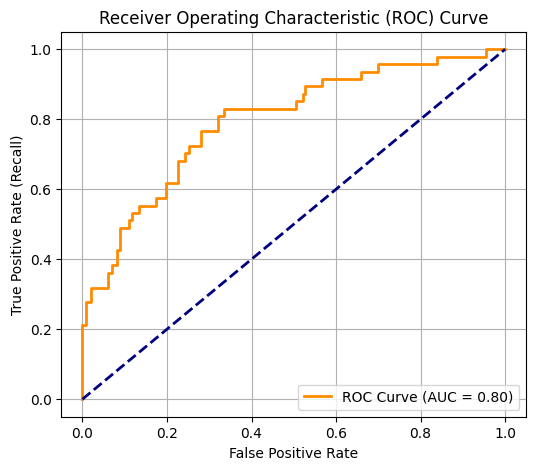

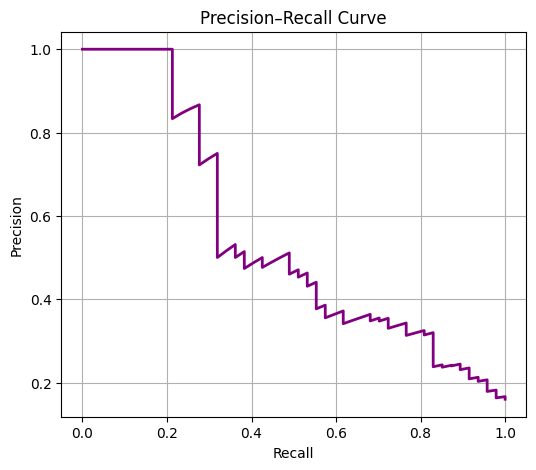

In [50]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# =========================
# ROC CURVE
# =========================
fpr, tpr, thresholds = roc_curve(y_test, y_proba_sm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# =========================
# PRECISION–RECALL CURVE
# =========================
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba_sm)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.grid(True)
plt.show()
